# Students Project 2023/24

## Workproject Clustering Validation



## 1. Define the paths and args 
Set the arguments and paths to execute the pipeline.

In [1]:
## Arguments

# subset PCA
start = 1
n_pcs = 20

# n_neighbors
n_neighbors=15
method='umap'
metric='euclidean'

# UMAP
spread=2.5
min_dist=0.1

# tSNE
perplexity=40

# Plot embedding
color='total_counts'

# Feel free to extent this with arguments needed downstream

# Filepaths:

h5ad_path = "/mnt/workspace_stud/mbentse/catlas_objects/esophagus_muscularis_SM-A8CPH.h5ad"
#h5ad_path = "/mnt/workspace_stud/mbentse/catlas_objects/heart_lv_SM-IOBHO.h5ad"

#cell_metadata = "/home/stud2/Cell_metadata.tsv"
esophagus_muscularis_metadata = "/mnt/workspace_stud/allstud/wp1/data/catlas_metadata/esophagus_muscularis_metadata.tsv"

## 2. Imports

In [2]:
# Import packages
import episcanpy as epi
import scanpy as sc
import numpy as np
import datetime

from sklearn_som.som import SOM
from load_metadata_rewrite import load_metadata as load_metadata_re

import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

import anndata as ad
import pandas as pd

## 3. Read h5ad files and build anndata objects

In [3]:
adata = epi.read_h5ad(h5ad_path)

## 4. Inspect files

In [4]:
!head "/mnt/workspace_stud/allstud/wp1/data/catlas_metadata/esophagus_muscularis_metadata.tsv"

cellID	logUMI	tsse	tissue	cell type	Life stage
esophagus_muscularis_SM-A8CPH_1+AAACTACCAGAACGACTGCTCG	4.004965887106823	16.405702266884784	esophagus_muscularis_SM-A8CPH	Fibroblast (General)	Adult
esophagus_muscularis_SM-A8CPH_1+AAACTACCAGAATGGCCGTTTC	4.045635871078219	10.858585858585856	esophagus_muscularis_SM-A8CPH	Fibroblast (General)	Adult
esophagus_muscularis_SM-A8CPH_1+AAACTACCAGAGTCCTGGTACT	3.7144974086498057	19.095987811071613	esophagus_muscularis_SM-A8CPH	Fibroblast (General)	Adult
esophagus_muscularis_SM-A8CPH_1+AAACTACCAGCAACCGTACATC	3.9008585047019912	12.575090108129755	esophagus_muscularis_SM-A8CPH	Fibroblast (General)	Adult
esophagus_muscularis_SM-A8CPH_1+AAACTACCAGCAGCGAAGACCT	3.8459657615454836	10.138248847926269	esophagus_muscularis_SM-A8CPH	Fibroblast (General)	Adult
esophagus_muscularis_SM-A8CPH_1+AAACTACCAGCATCTCGACAAT	3.8044120591377135	8.894702419882277	esophagus_muscularis_SM-A8CPH	Fibroblast (General)	Adult
esophagus_muscularis_SM-A8CPH_1+AAACTACCAGCATTAGTGTACC	3

### 4.1 .obs table

In [5]:
adata.obs

""
index
esophagus_muscularis_SM-A8CPH_1+AAGCTATACCGCTTCTCACAAG
esophagus_muscularis_SM-A8CPH_1+AATTCGGATGAAATGCTACGGG
esophagus_muscularis_SM-A8CPH_1+ACTGCACAGAGTCCAGATTTCC
esophagus_muscularis_SM-A8CPH_1+AGGTCACTGAGCTTACAATCGT
esophagus_muscularis_SM-A8CPH_1+AGTCGGAACGCCCAAGATCGAC
...
esophagus_muscularis_SM-A8CPH_1+CCATCTGGCATGCGATCGTTAG
esophagus_muscularis_SM-A8CPH_1+TTATGGATGCAAAGGATCGGCT
esophagus_muscularis_SM-A8CPH_1+ACGTGTTGGTGAGTGTGGCATA


In [6]:
%%time
# Example: ['cellID', 'logUMI', 'tsse', 'tissue', 'cell type', 'Life stage']
columns_to_keep = ['cell type']
load_metadata_re(adata, esophagus_muscularis_metadata, columns_to_keep=columns_to_keep)

CPU times: user 1min 2s, sys: 81.2 ms, total: 1min 2s
Wall time: 1min 2s


In [7]:
adata.obs

,cell_type
index,
esophagus_muscularis_SM-A8CPH_1+AAGCTATACCGCTTCTCACAAG,Naive T cell
esophagus_muscularis_SM-A8CPH_1+AATTCGGATGAAATGCTACGGG,Naive T cell
esophagus_muscularis_SM-A8CPH_1+ACTGCACAGAGTCCAGATTTCC,Naive T cell
esophagus_muscularis_SM-A8CPH_1+AGGTCACTGAGCTTACAATCGT,Naive T cell
esophagus_muscularis_SM-A8CPH_1+AGTCGGAACGCCCAAGATCGAC,Naive T cell
...,...
esophagus_muscularis_SM-A8CPH_1+CCATCTGGCATGCGATCGTTAG,Fibroblast (Gastrointestinal)
esophagus_muscularis_SM-A8CPH_1+TTATGGATGCAAAGGATCGGCT,Fibroblast (Gastrointestinal)
esophagus_muscularis_SM-A8CPH_1+ACGTGTTGGTGAGTGTGGCATA,Smooth Muscle (Colon) 1


### 4.2 .var table

In [8]:
adata.var

""
index
chr1:9955-10355
chr1:29163-29563
chr1:79215-79615
chr1:102755-103155
chr1:180580-180980
...
chrY:56676947-56677347
chrY:56677442-56677842
chrY:56678029-56678429


In [9]:
adata.X

<10997x1154611 sparse matrix of type '<class 'numpy.float32'>'
	with 35591247 stored elements in Compressed Sparse Row format>

## 5. Add metrics

In [10]:
# compute metrics
sc.pp.calculate_qc_metrics(adata=adata, percent_top=None, inplace=True)

In [11]:
adata.obs

,cell_type,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts
index,,,,,
esophagus_muscularis_SM-A8CPH_1+AAGCTATACCGCTTCTCACAAG,Naive T cell,6264,8.742734,10835.0,9.290629
esophagus_muscularis_SM-A8CPH_1+AATTCGGATGAAATGCTACGGG,Naive T cell,827,6.719013,1365.0,7.219642
esophagus_muscularis_SM-A8CPH_1+ACTGCACAGAGTCCAGATTTCC,Naive T cell,2334,7.755767,4000.0,8.294300
esophagus_muscularis_SM-A8CPH_1+AGGTCACTGAGCTTACAATCGT,Naive T cell,768,6.645091,1181.0,7.074963
esophagus_muscularis_SM-A8CPH_1+AGTCGGAACGCCCAAGATCGAC,Naive T cell,2940,7.986505,4891.0,8.495357
...,...,...,...,...,...
esophagus_muscularis_SM-A8CPH_1+CCATCTGGCATGCGATCGTTAG,Fibroblast (Gastrointestinal),1612,7.385851,2685.0,7.895808
esophagus_muscularis_SM-A8CPH_1+TTATGGATGCAAAGGATCGGCT,Fibroblast (Gastrointestinal),539,6.291569,888.0,6.790097
esophagus_muscularis_SM-A8CPH_1+ACGTGTTGGTGAGTGTGGCATA,Smooth Muscle (Colon) 1,1005,6.913737,1593.0,7.374002


## 6. Normalize adata

In [12]:
sc.pp.normalize_total(adata, exclude_highly_expressed=False, target_sum=None)
sc.pp.log1p(adata)

## 7. Dimension Reduction PCA
### 7.1 Compute PCA

In [13]:
%%time
#epi.pp.binarize(adata_cCRE)
sc.pp.pca(adata, use_highly_variable=False)

CPU times: user 5min 5s, sys: 8min 59s, total: 14min 4s
Wall time: 3min 55s


### 7.2 Plot PCA

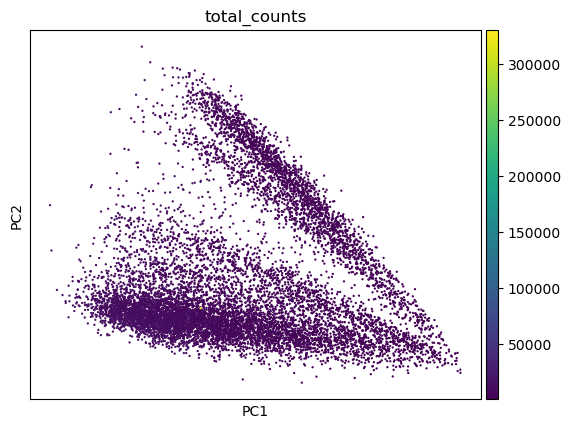

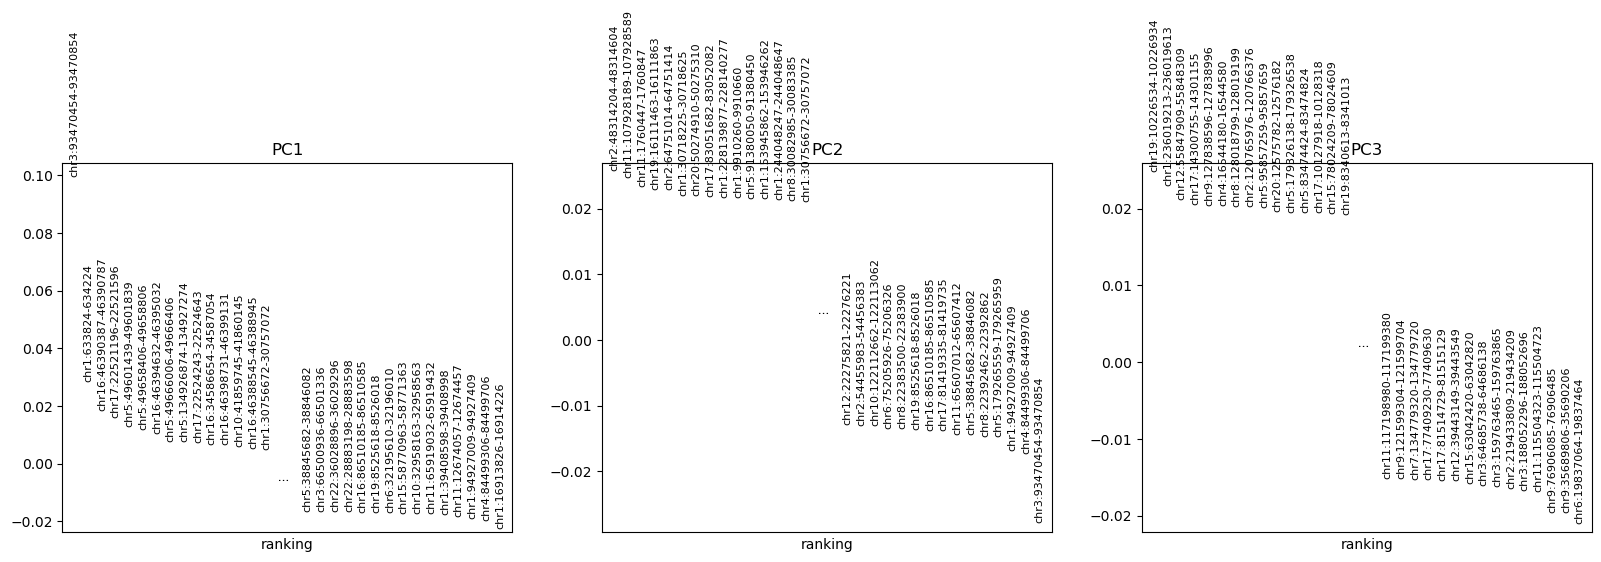

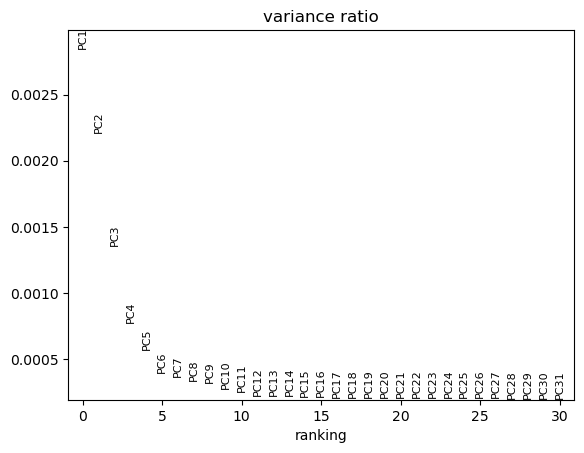

In [14]:
sc.pl.pca_overview(adata, color="total_counts")

### 7.3 Subset PCA

In [15]:
adata.obsm["X_pca"] = adata.obsm["X_pca"][:, start:n_pcs]
adata.varm["PCs"] = adata.varm["PCs"][:, start:n_pcs]

if "variance_ratio" in adata.uns.get("pca", {}):
    adata.uns["pca"]["variance_ratio"] = adata.uns["pca"]["variance_ratio"][start:n_pcs]

## 8. Embedding

### 8.1 UMAP 
#### 8.1.1 Compute the neighborhood using UMAP

In [16]:
sc.pp.neighbors(adata, n_neighbors=n_neighbors, method=method, metric=metric)

#### 8.1.2 perform umap embedding

In [17]:
sc.tl.umap(adata, spread=spread, min_dist=min_dist)

<Axes: title={'center': 'log1p_total_counts'}, xlabel='UMAP1', ylabel='UMAP2'>

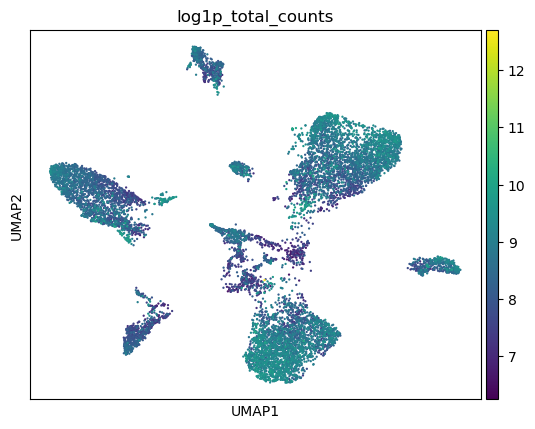

In [18]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color='log1p_total_counts')

### 8.2 TSNE

In [19]:
sc.tl.tsne(adata, perplexity=perplexity)

<Axes: title={'center': 'log1p_total_counts'}, xlabel='tSNE1', ylabel='tSNE2'>

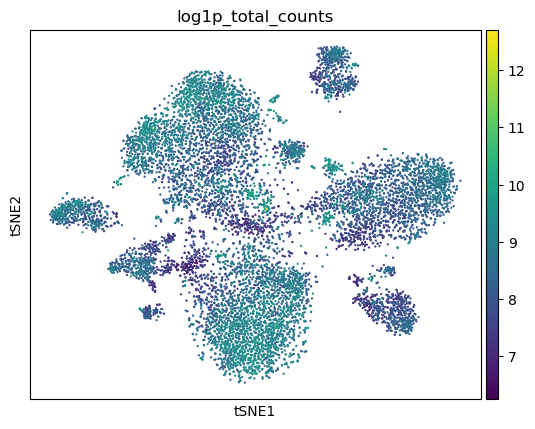

In [20]:
sc.pl.embedding(adata, basis='tsne', ncols=3, show=False, color="log1p_total_counts")

## 9 Clustering

### 9.1 Louvain 

In [21]:
# Performe a louvain clustering with resolution x
louvain_resolution = 1.0 # Default value
louvain_tag = f'louvain-R:{louvain_resolution}'
sc.tl.louvain(adata, key_added=louvain_tag)

<Axes: title={'center': 'louvain-R:1.0'}, xlabel='UMAP1', ylabel='UMAP2'>

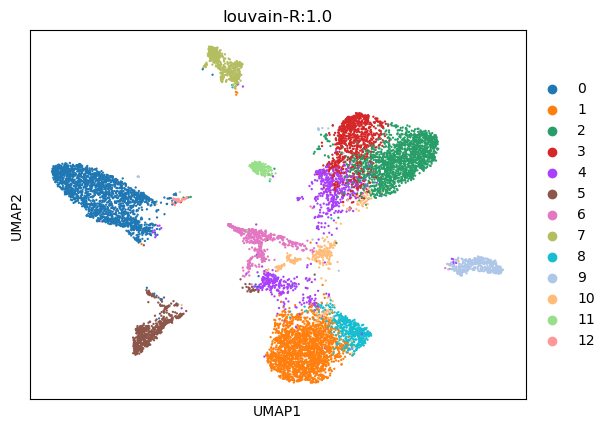

In [22]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color=louvain_tag)

In [23]:
# Docu: 'Function will test different settings of louvain to obtain the target number of clusters.' 
louvain_nclusters = 13
epi.tl.getNClusters(adata, n_cluster=13,  key_added=f'louvain-C:{louvain_nclusters}')

step 0
got 16 at resolution 1.5
step 1
got 10 at resolution 0.75
step 2
got 13 at resolution 1.125


### 9.2 Leiden


In [24]:
# Performe a leiden clustering with resolution x
leiden_resolution = 1.0 # Default value
leiden_tag = f'leiden-R:{leiden_resolution}'
sc.tl.leiden(adata, key_added=leiden_tag)

<Axes: title={'center': 'leiden-R:1.0'}, xlabel='UMAP1', ylabel='UMAP2'>

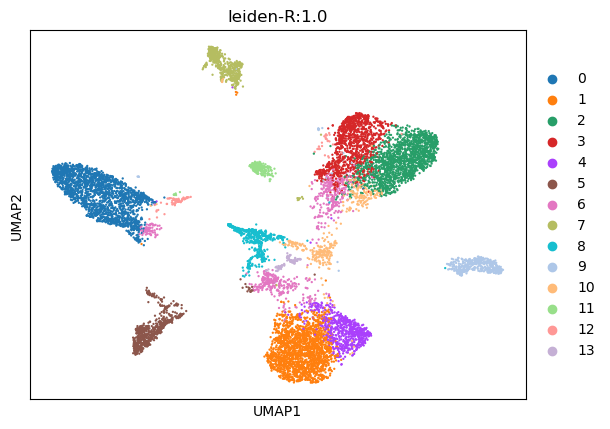

In [25]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color=leiden_tag)

In [26]:
# Docu: 'Function will test different settings of leiden to obtain the target number of clusters.' 
leiden_nclusters = 13
epi.tl.getNClusters(adata, n_cluster=13, method='leiden', key_added=f'leiden-C:{leiden_nclusters}')

step 0
got 20 at resolution 1.5
step 1
got 12 at resolution 0.75
step 2
got 16 at resolution 1.125
step 3
got 14 at resolution 0.9375
step 4
got 13 at resolution 0.84375


### 9.3 k-means 

In [27]:
# Performes a basic kmeans clustering
epi.tl.kmeans(adata, num_clusters=13)

<Axes: title={'center': 'kmeans'}, xlabel='UMAP1', ylabel='UMAP2'>

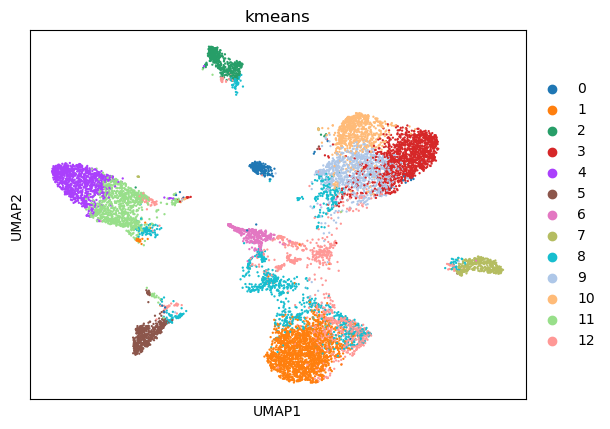

In [28]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color='kmeans')

### 9.4 Visual comparision


[<Axes: title={'center': 'louvain-R:1.0'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'leiden-R:1.0'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'kmeans'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'cell_type'}, xlabel='UMAP1', ylabel='UMAP2'>]

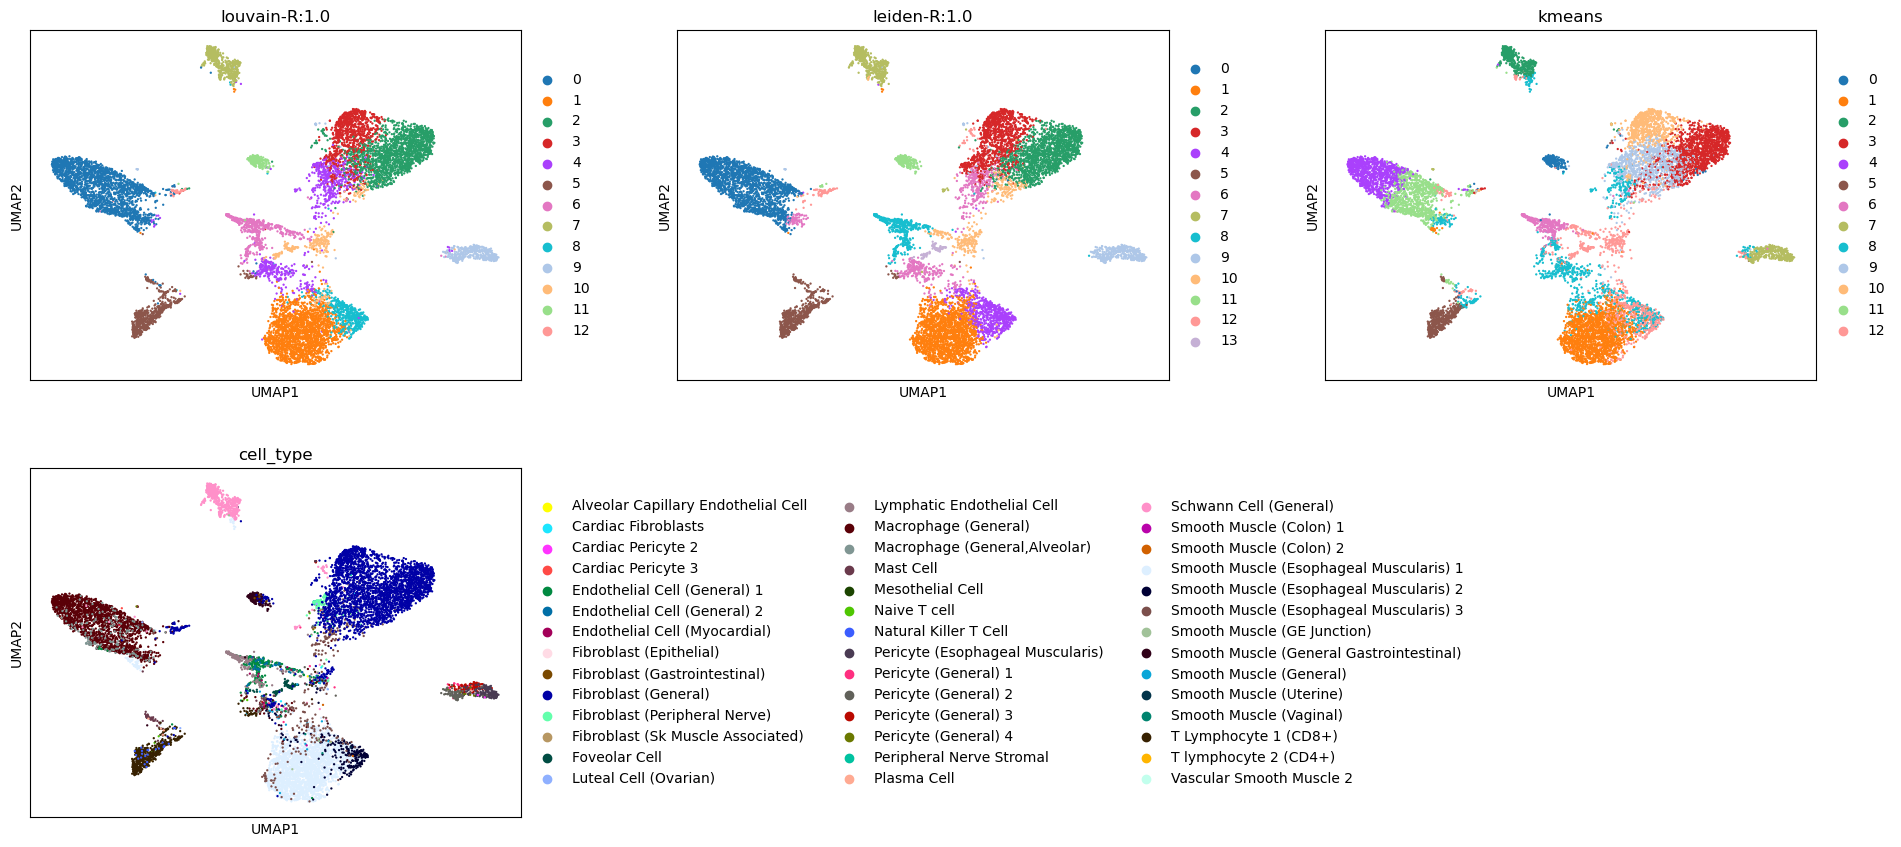

In [29]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color=[louvain_tag, leiden_tag, 'kmeans', 'cell_type'], wspace=0.2)

In [30]:
# (Kind of) Differences between Leiden and Louvain
# [Not really, since cluster 3 could be the same as cluster 2 in two different methods, just differently called. and 2!=3]
len( [ 1 for i,j in zip(adata.obs[louvain_tag],adata.obs[leiden_tag]) if i!=j ] )

2551

In [31]:
adata.uns['clusters'] = {}
adata.uns['clusters']['cluster1'] = {}
adata.uns['clusters']['cluster1']['preprocessing'] = {}
adata.uns['clusters']['cluster1']['preprocessing']['pca_dimensions'] = 20
adata.uns['clusters']['cluster1']['preprocessing']['n_neighbors'] = 25
adata.uns['clusters']['cluster1']['preprocessing']['tsne_perplexity'] = 40
adata.uns['clusters']['cluster1']['scores'] = {}
adata.uns['clusters']['cluster1']['scores']['RAGI'] = 0.84
adata.uns['clusters']['cluster1']['scores']['ARI'] = 0.59
adata.uns['clusters']['cluster1']['scores']['AMI'] = 0.63
adata.uns['clusters']['cluster1']['scores']['HS'] = 0.61
adata.uns['clusters']['cluster1']['author'] = 'Leonard'
adata.uns['clusters']['cluster1']['date'] = str(datetime.datetime.now())
adata.uns['clusters']['cluster1']['method'] = 'Louvain'

adata.uns['clusters']['cluster2'] = '...'
adata.uns['clusters']['cluster3'] = '...'

adata.uns['clusters']

{'cluster1': {'preprocessing': {'pca_dimensions': 20,
   'n_neighbors': 25,
   'tsne_perplexity': 40},
  'scores': {'RAGI': 0.84, 'ARI': 0.59, 'AMI': 0.63, 'HS': 0.61},
  'author': 'Leonard',
  'date': '2023-12-04 21:15:23.749602',
  'method': 'Louvain'},
 'cluster2': '...',
 'cluster3': '...'}

In [32]:
adata.uns['clusters']['cluster1']['scores']['RAGI']

0.84

## 10 Clustering comparision and evaluation

### 10.1 ARI (Ajusted Rand Index)

In [33]:
#  It computes a similarity measure between two clusterings (predicted and true labels)by counting cells that are assigned
#  in the same or different clusters between the two clusterings 
print('ARI-louvain:\t', epi.tl.ARI(adata, louvain_tag, 'cell_type'))
print('ARI-leiden:\t', epi.tl.ARI(adata, leiden_tag, 'cell_type'))
print('ARI-kmeans:\t', epi.tl.ARI(adata, 'kmeans', 'cell_type'))

ARI-louvain:	 0.6341689850414304
ARI-leiden:	 0.5996980638603746
ARI-kmeans:	 0.46284892715016057


### 10.2 AMI (Adjusted Mutual Information)

In [34]:
# The score is higher when the different clusters contain only cells with the same ground truth label
print('AMI-louvain:\t', epi.tl.AMI(adata, louvain_tag, 'cell_type'))
print('AMI-leiden:\t', epi.tl.AMI(adata, leiden_tag, 'cell_type'))
print('AMI-kmeans:\t', epi.tl.AMI(adata, 'kmeans', 'cell_type'))

AMI-louvain:	 0.701702455867268
AMI-leiden:	 0.6924267222844328
AMI-kmeans:	 0.6080414419082815


### 10.3 HS (Homogeneity score)

In [35]:
#  HS is a measure of the similarity between two labels of the same data, while accounting for chance
#  (the Mutual information is generally higher for two set of labels with a large number of clusters)
print('HS-louvain:\t', epi.tl.homogeneity(adata, louvain_tag, 'cell_type'))
print('HS-leiden:\t', epi.tl.homogeneity(adata, leiden_tag, 'cell_type'))
print('HS-kmeans:\t', epi.tl.homogeneity(adata, 'kmeans', 'cell_type'))

HS-louvain:	 0.6969383780007637
HS-leiden:	 0.6774698942242661
HS-kmeans:	 0.5854951570658576
